## **K-Means, DBSCAN**

##### Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

##### Data Preprocessing

In [2]:

data = pd.read_csv(r"E:\vs code\Datasets\Mall_Customers.xls")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

##### Clustering based on Annual Income and Spending Score

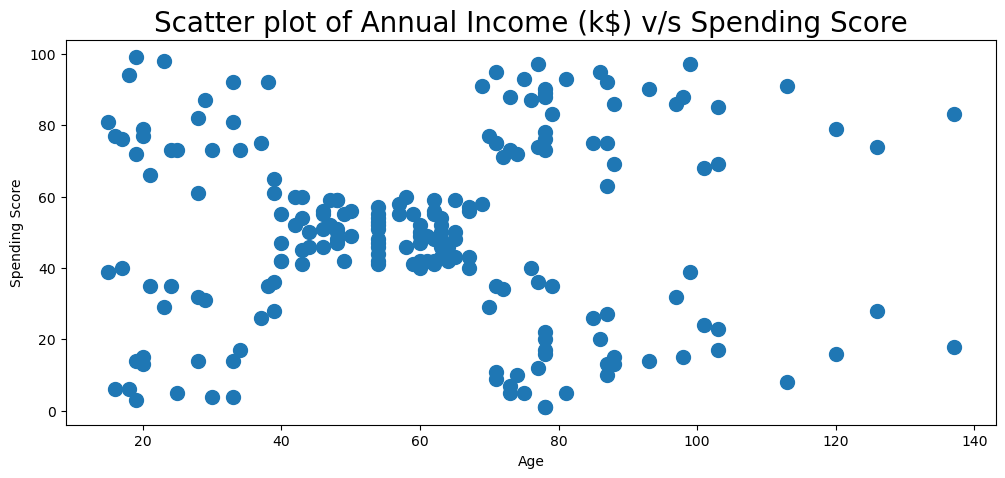

In [4]:
plt.figure(1 , figsize = (12,5))
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data, s = 100)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter plot of Annual Income (k$) v/s Spending Score', fontsize = 20)
plt.show()

##### **K-Means**

In [7]:
sub = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values



# Apply K-means clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
data['kmeans_cluster'] = kmeans.fit_predict(sub)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

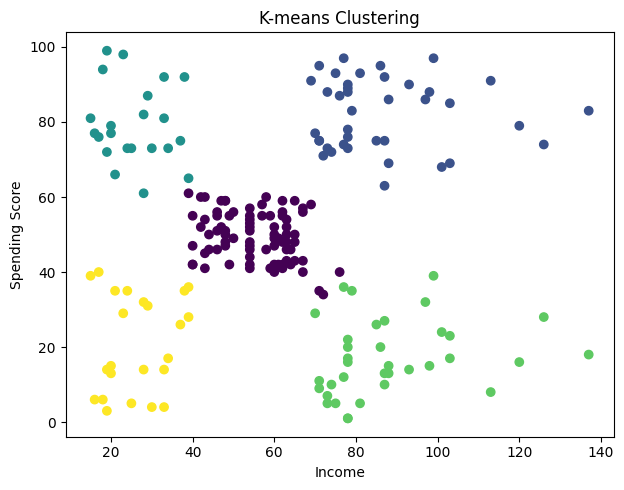

In [98]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['kmeans_cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Income')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

In [99]:
# Evaluate the model using silhouette score
silhouette_kmeans = silhouette_score(sub, data['kmeans_cluster'])

print(f"Silhouette Score (K-means): {silhouette_kmeans}")

Silhouette Score (K-means): 0.553931997444648


##### **DBSCAN**

In [100]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=1)
data['dbscan_cluster'] = dbscan.fit_predict(sub)

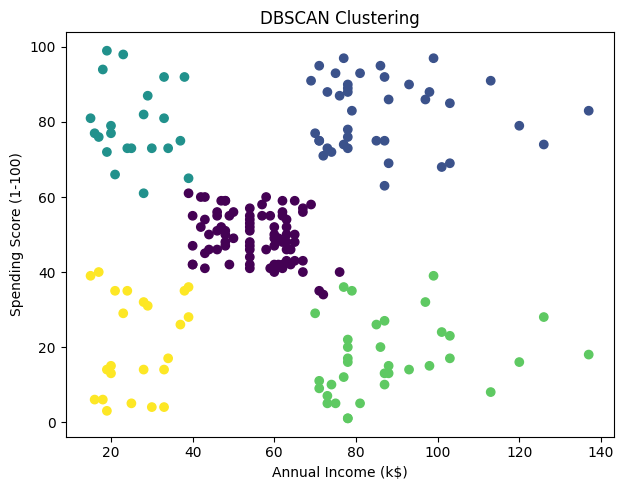

In [101]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['kmeans_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

In [102]:
# Evaluate the model using silhouette score
silhouette_dbscan = silhouette_score(sub, data['dbscan_cluster'])

print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")

Silhouette Score (DBSCAN): 0.04
